# Deep Learning Term Project for ECG (DIL700)

# Iteration 1

## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib widget
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.utils import class_weight
import warnings
import os
from general_functions import *
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


warnings.filterwarnings('ignore')

## Loading Dataset

Collect all the data from the csv files

In [2]:
train_df=combine_csv_files_to_df('./Dataset_mitbih/Training/')
test_df=combine_csv_files_to_df('./Dataset_mitbih/Testing/')
# Put together the training and testing
full_df=pd.concat([train_df,test_df],ignore_index=True)


## Removing class 3 and renaming class 4 to class 3

In [3]:
train_df = train_df[train_df[187] != 3]
test_df = test_df[test_df[187] != 3]
full_df = full_df[full_df[187] != 3]

train_df.loc[train_df[187] == 4, 187] = 3
test_df.loc[test_df[187] == 4, 187] = 3
full_df.loc[full_df[187] == 4, 187] = 3


In [4]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


In [5]:
test_df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
21888,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
21889,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
21890,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


In [6]:
print(train_df[187].unique())

[0. 1. 2. 3.]


In [7]:
labels = ['Normal', 'Artial Premature', 'Premature ventricular contraction', 'Paced']
labels_short =  ["N","S","V","Q"]

In [8]:
print('Number of samples in data:')
print(labels[0],':', len(train_df[train_df[187]==0]))
print(labels[1],':', len(train_df[train_df[187]==1]))
print(labels[2],':', len(train_df[train_df[187]==2]))
print(labels[3],':', len(train_df[train_df[187]==3]))

Number of samples in data:
Normal : 72471
Artial Premature : 2223
Premature ventricular contraction : 5788
Paced : 6431


In [9]:
print('Number of samples in data:')
print(labels[0],':', len(test_df[test_df[187]==0]))
print(labels[1],':', len(test_df[test_df[187]==1]))
print(labels[2],':', len(test_df[test_df[187]==2]))
print(labels[3],':', len(test_df[test_df[187]==3]))

Number of samples in data:
Normal : 18118
Artial Premature : 556
Premature ventricular contraction : 1448
Paced : 1608


## Preparation

In [10]:
X_train = train_df.iloc[:, :-1]
y_train = train_df.iloc[:, -1]

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=82)

y_train_nn = pd.get_dummies(y_train, columns=[1])
y_train_nn = y_train_nn.rename(columns={0: "N", 1: "S", 2: "V", 3: "Q"})

y_valid_nn = pd.get_dummies(y_valid, columns=[1])
y_valid_nn = y_valid_nn.rename(columns={0: "N", 1: "S", 2: "V", 3: "Q"})

X_test = test_df.iloc[:, :-1]
y_test = test_df.iloc[:, -1]
y_test_nn = pd.get_dummies(y_test, columns=[1])
y_test_nn = y_test_nn.rename(columns={0: "N", 1: "S", 2: "V", 3: "Q"})

In [11]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
28367,0.989610,0.888312,0.425974,0.049351,0.096104,0.124675,0.101299,0.093506,0.096104,0.090909,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62622,1.000000,0.954751,0.266968,0.000000,0.063348,0.099548,0.104072,0.176471,0.153846,0.126697,...,0.298643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3227,1.000000,0.942431,0.686567,0.422175,0.321962,0.268657,0.179104,0.138593,0.149254,0.147122,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57171,1.000000,0.875831,0.170732,0.000000,0.106430,0.137472,0.128603,0.119734,0.113082,0.099778,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69122,1.000000,0.773333,0.053333,0.073333,0.090000,0.093333,0.086667,0.093333,0.083333,0.086667,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38510,0.975357,0.941634,0.498054,0.000000,0.068742,0.125811,0.057069,0.050584,0.044099,0.040208,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19805,0.990672,0.777985,0.139925,0.037313,0.098881,0.102612,0.115672,0.111940,0.110075,0.123134,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41091,1.000000,0.905405,0.705405,0.354054,0.170270,0.124324,0.102703,0.059459,0.062162,0.037838,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4546,1.000000,0.510791,0.000000,0.089928,0.089928,0.118705,0.111511,0.115108,0.097122,0.107914,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
y_train

28367    0.0
62622    0.0
3227     0.0
57171    0.0
69122    0.0
        ... 
38510    0.0
19805    0.0
41091    0.0
4546     0.0
77955    2.0
Name: 187, Length: 69530, dtype: float64

In [13]:
X_valid

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
14772,0.964912,0.912281,0.583960,0.273183,0.147870,0.120301,0.092732,0.060150,0.050125,0.030075,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49137,0.987080,0.953488,0.731266,0.253230,0.069767,0.139535,0.103359,0.038760,0.012920,0.025840,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31361,0.000000,0.294118,0.745098,0.281046,0.117647,0.372549,0.588235,0.575163,0.633987,0.620915,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60850,0.817021,0.646809,0.178723,0.051064,0.085106,0.136170,0.131915,0.229787,0.234043,0.136170,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64495,1.000000,0.890966,0.520249,0.261682,0.168224,0.161994,0.118380,0.099688,0.074766,0.087227,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45252,0.993661,0.801902,0.193344,0.000000,0.215531,0.213946,0.221870,0.231379,0.231379,0.225040,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61241,1.000000,0.789256,0.107438,0.012397,0.097107,0.088843,0.070248,0.057851,0.047521,0.051653,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30540,1.000000,0.695946,0.087838,0.020270,0.077703,0.094595,0.097973,0.091216,0.091216,0.087838,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86618,1.000000,0.854054,0.578378,0.370270,0.275676,0.300000,0.291892,0.308108,0.297297,0.305405,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Dataset Distribution

### Training set

In [14]:
train_df[187]=train_df[187].astype(int)
equilibre_train=train_df[187].value_counts(sort=False)
print(equilibre_train)

0    72471
1     2223
2     5788
3     6431
Name: 187, dtype: int64


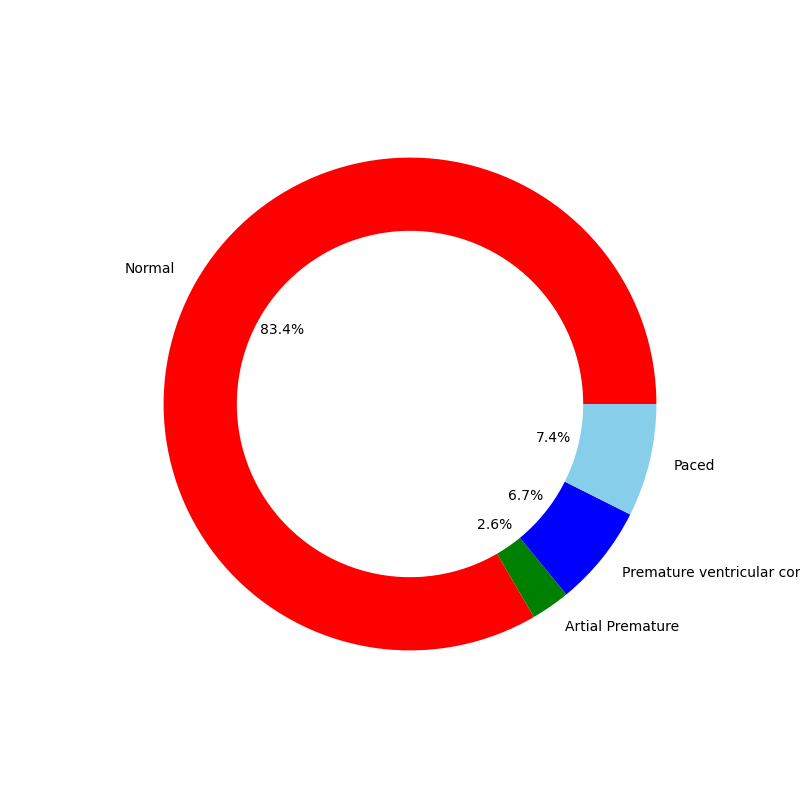

In [15]:
plt.figure(figsize=(8,8))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre_train, labels= labels
        , colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

### Testing set

In [16]:
test_df[187]=test_df[187].astype(int)
equilibre_test=test_df[187].value_counts(sort=False)
print(equilibre_test)

0    18118
1      556
2     1448
3     1608
Name: 187, dtype: int64


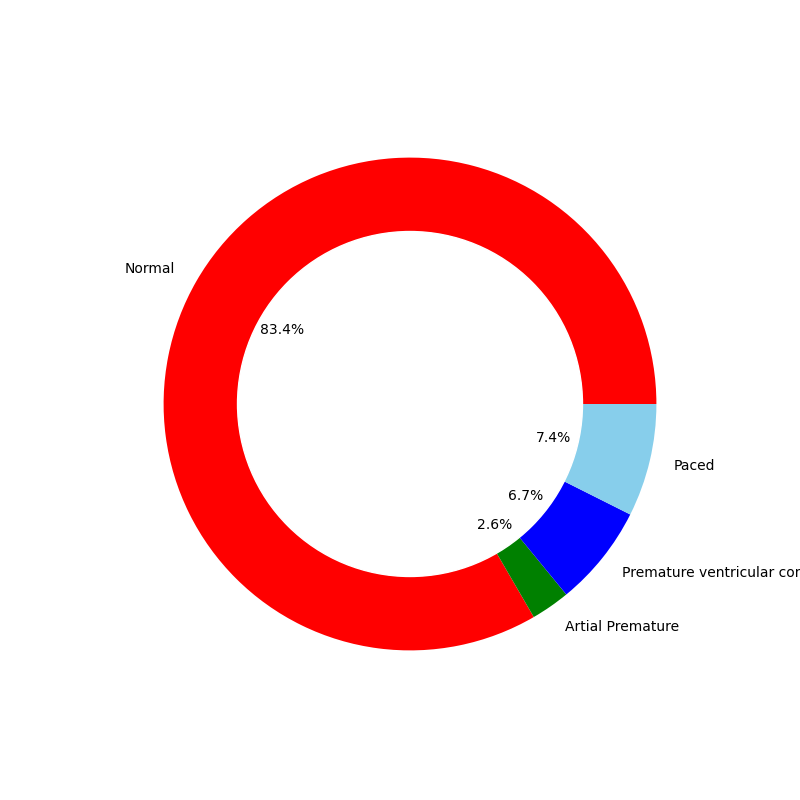

In [17]:
plt.figure(figsize=(8,8))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre_test, labels= labels
        , colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

# Training some ML Models

## SVM

In [18]:
# Train SVM classifier
svm = SVC(kernel='poly', C=1, random_state=42)
svm.fit(X_train, y_train)

SVC(C=1, kernel='poly', random_state=42)

### Evaluation

In [19]:
y_pred_svm = svm.predict(X_test)
print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred_svm):.5f}')

Accuracy: 0.96963


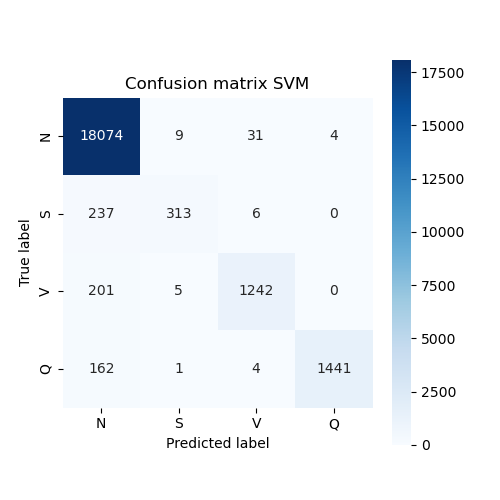

In [20]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)

# Plot confusion matrix
plt.figure(figsize=(5,5))
ax = plt.subplot(111)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', square=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix SVM')
ax.xaxis.set_ticklabels(labels_short)
ax.yaxis.set_ticklabels(labels_short)
plt.show()

In [21]:
# Calculate the accurcay for each label
acc_per_class = cm.diagonal()/cm.sum(axis=1)
print('Accuracy per class: ', acc_per_class)
# Take the avearge of the accuracies
acc = np.mean(acc_per_class)
print('Macro/average accuracy: ', acc)


Accuracy per class:  [0.99757148 0.56294964 0.85773481 0.89614428]
Macro/average accuracy:  0.8286000503512273


In [22]:
print(classification_report(y_test, y_pred_svm, target_names=labels))

                                   precision    recall  f1-score   support

                           Normal       0.97      1.00      0.98     18118
                 Artial Premature       0.95      0.56      0.71       556
Premature ventricular contraction       0.97      0.86      0.91      1448
                            Paced       1.00      0.90      0.94      1608

                         accuracy                           0.97     21730
                        macro avg       0.97      0.83      0.89     21730
                     weighted avg       0.97      0.97      0.97     21730



#### False Positive Rate

In [23]:
num_classes = cm.shape[0]
total_abnormal= 0
total_wrong_predicted = 0
for i in range(num_classes-1): 
    total_abnormal_class = np.sum(cm[i+1, :])
    total_abnormal = total_abnormal + total_abnormal_class

    wrong_predicted = np.sum(cm[i+1, 0])
    total_wrong_predicted = total_wrong_predicted + wrong_predicted

print("Total number of abnormal classes: ", total_abnormal)
print("Total number of wrong predicted abnormal classes: ", total_wrong_predicted)
print("Percentage of sick persons that are classified as normal: ", wrong_predicted/total_abnormal_class*100, "%")    

Total number of abnormal classes:  3612
Total number of wrong predicted abnormal classes:  600
Percentage of sick persons that are classified as normal:  10.074626865671641 %


In [24]:
report = classification_report(y_test, y_pred_svm, digits=4)
print(report)

# Create the classification report table
results_table_latex(cm, report, "SVM")

              precision    recall  f1-score   support

         0.0     0.9679    0.9976    0.9825     18118
         1.0     0.9543    0.5629    0.7081       556
         2.0     0.9680    0.8577    0.9096      1448
         3.0     0.9972    0.8961    0.9440      1608

    accuracy                         0.9696     21730
   macro avg     0.9719    0.8286    0.8860     21730
weighted avg     0.9697    0.9696    0.9678     21730



## Random Forest

In [25]:
# Train random forest classifier
rfc = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Evaluation

In [26]:
y_pred_rfc = rfc.predict(X_test)
print(f'Weighted Accuracy: {metrics.accuracy_score(y_test, y_pred_rfc):.5f}')

Weighted Accuracy: 0.97625


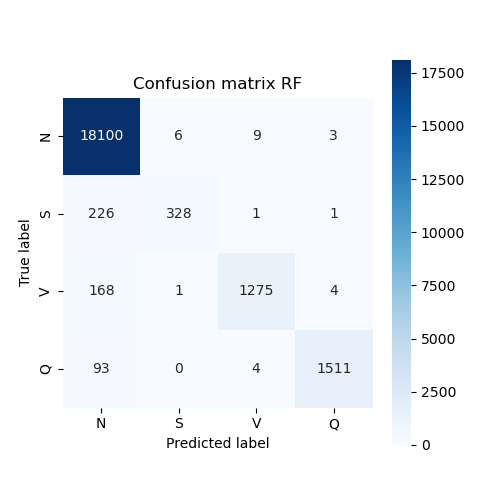

In [27]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_rfc)

# Plot confusion matrix
plt.figure(figsize=(5,5))
ax = plt.subplot(111)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', square=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix RF')
ax.xaxis.set_ticklabels(labels_short)
ax.yaxis.set_ticklabels(labels_short)
plt.show()

In [28]:
# Calculate the accurcay for each label
acc_per_class = cm.diagonal()/cm.sum(axis=1)
print('Accuracy per class: ', acc_per_class)
# Take the avearge of the accuracies
acc = np.mean(acc_per_class)
print('Macro/average accuracy: ', acc)


Accuracy per class:  [0.99900651 0.58992806 0.88052486 0.93967662]
Macro/average accuracy:  0.852284012301993


In [29]:
report = classification_report(y_test, y_pred_rfc, target_names=labels, digits=4)
print(report)

                                   precision    recall  f1-score   support

                           Normal     0.9738    0.9990    0.9862     18118
                 Artial Premature     0.9791    0.5899    0.7363       556
Premature ventricular contraction     0.9891    0.8805    0.9317      1448
                            Paced     0.9947    0.9397    0.9664      1608

                         accuracy                         0.9763     21730
                        macro avg     0.9842    0.8523    0.9051     21730
                     weighted avg     0.9765    0.9763    0.9747     21730



#### False Positive Rate

In [30]:
num_classes = cm.shape[0]
total_abnormal= 0
total_wrong_predicted = 0
for i in range(num_classes-1): 
    total_abnormal_class = np.sum(cm[i+1, :])
    total_abnormal = total_abnormal + total_abnormal_class

    wrong_predicted = np.sum(cm[i+1, 0])
    total_wrong_predicted = total_wrong_predicted + wrong_predicted

print("Total number of abnormal classes: ", total_abnormal)
print("Total number of wrong predicted abnormal classes: ", total_wrong_predicted)
print("Percentage of sick persons that are classified as normal: ", wrong_predicted/total_abnormal_class*100, "%")    

Total number of abnormal classes:  3612
Total number of wrong predicted abnormal classes:  487
Percentage of sick persons that are classified as normal:  5.7835820895522385 %


In [31]:
report = classification_report(y_test, y_pred_rfc, digits=4)
print(report)

# Create the classification report table
results_table_latex(cm, report, "Random Forest")

              precision    recall  f1-score   support

         0.0     0.9738    0.9990    0.9862     18118
         1.0     0.9791    0.5899    0.7363       556
         2.0     0.9891    0.8805    0.9317      1448
         3.0     0.9947    0.9397    0.9664      1608

    accuracy                         0.9763     21730
   macro avg     0.9842    0.8523    0.9051     21730
weighted avg     0.9765    0.9763    0.9747     21730

